https://github.com/langchain-ai/langgraph/blob/main/docs/docs/tutorials/customer-support/customer-support.ipynb

https://mlc.ai/

In [1]:
import getpass
import os


def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")


# _set_env("ANTHROPIC_API_KEY")
_set_env("GOOGLE_API_KEY")
_set_env("TAVILY_API_KEY")
_set_env("GROQ_API_KEY")

In [2]:
import os
import shutil
import sqlite3

import pandas as pd
import requests

In [3]:
db_url = "https://storage.googleapis.com/benchmarks-artifacts/travel-db/travel2.sqlite"


In [3]:
local_file = "travel2.sqlite"

In [4]:

backup_file = "travel2.backup.sqlite"

In [ ]:

overwrite = False


In [7]:
if overwrite or not os.path.exists(local_file):
    response = requests.get(db_url)
    response.raise_for_status()  # Ensure the request was successful
    with open(local_file, "wb") as f:
        f.write(response.content)
    # Backup - we will use this to "reset" our DB in each section
    shutil.copy(local_file, backup_file)

In [141]:
file = local_file

In [143]:
shutil.copy(backup_file, file)
    
conn = sqlite3.connect(file)
cursor = conn.cursor()

In [144]:
cursor

In [145]:
tables = pd.read_sql("SELECT name from sqlite_master where type='table';", conn).name.tolist()


In [146]:
tables

['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets',
 'car_rentals',
 'hotels',
 'trip_recommendations']

In [147]:
tdf = {}
for t in tables:
    tdf[t] = pd.read_sql(f"SELECT * from {t}", conn)

In [148]:
tdf["flights"]

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,QR0051,2024-05-26 03:59:03.561731-04:00,2024-05-26 09:04:03.561731-04:00,BSL,BKK,Scheduled,319,None,None
1,3979,MU0066,2024-05-10 08:59:03.561731-04:00,2024-05-10 11:44:03.561731-04:00,SHA,CUN,Scheduled,CR2,None,None
2,4739,QF0126,2024-05-21 06:39:03.561731-04:00,2024-05-21 08:24:03.561731-04:00,SHA,AMS,Scheduled,763,None,None
3,5502,LX0136,2024-05-28 03:59:03.561731-04:00,2024-05-28 05:29:03.561731-04:00,OSL,PRG,Scheduled,763,None,None
4,6938,IB0075,2024-05-20 06:34:03.561731-04:00,2024-05-20 07:29:03.561731-04:00,OSL,RGN,Scheduled,SU9,None,None
...,...,...,...,...,...,...,...,...,...,...
33116,33117,CZ0061,2024-04-17 13:34:03.561731-04:00,2024-04-17 14:19:03.561731-04:00,NRT,OSL,Arrived,CR2,2024-04-17 13:34:03.561731-04:00,2024-04-17 14:19:03.561731-04:00
33117,33118,CZ0061,2024-04-12 13:34:03.561731-04:00,2024-04-12 14:19:03.561731-04:00,NRT,OSL,Arrived,CR2,2024-04-12 13:39:03.561731-04:00,2024-04-12 14:24:03.561731-04:00
33118,33119,CZ0061,2024-05-24 13:34:03.561731-04:00,2024-05-24 14:19:03.561731-04:00,NRT,OSL,Scheduled,CR2,None,None
33119,33120,CZ0061,2024-04-16 13:34:03.561731-04:00,2024-04-16 14:19:03.561731-04:00,NRT,OSL,Arrived,CR2,2024-04-16 13:35:03.561731-04:00,2024-04-16 14:21:03.561731-04:00


In [149]:
xample_time = pd.to_datetime(
        tdf["flights"]["actual_departure"])
    

In [150]:
xample_time

0                                    NaT
1                                    NaT
2                                    NaT
3                                    NaT
4                                    NaT
                      ...               
33116   2024-04-17 13:34:03.561731-04:00
33117   2024-04-12 13:39:03.561731-04:00
33118                                NaT
33119   2024-04-16 13:35:03.561731-04:00
33120                                NaT
Name: actual_departure, Length: 33121, dtype: datetime64[ns, UTC-04:00]

In [151]:
example_time = pd.to_datetime(
        tdf["flights"]["actual_departure"].replace("\\N", pd.NaT)
    )

In [152]:
example_time

0                                    NaT
1                                    NaT
2                                    NaT
3                                    NaT
4                                    NaT
                      ...               
33116   2024-04-17 13:34:03.561731-04:00
33117   2024-04-12 13:39:03.561731-04:00
33118                                NaT
33119   2024-04-16 13:35:03.561731-04:00
33120                                NaT
Name: actual_departure, Length: 33121, dtype: datetime64[ns, UTC-04:00]

In [153]:
example_time = pd.to_datetime(
        tdf["flights"]["actual_departure"].replace("\\N", pd.NaT)
    ).max()

In [154]:
example_time

Timestamp('2024-04-30 12:05:03.561731-0400', tz='UTC-04:00')

In [155]:
current_time = pd.to_datetime("now").tz_localize(example_time.tz)

In [156]:
current_time

Timestamp('2025-08-05 12:17:13.823731-0400', tz='UTC-04:00')

In [157]:
time_diff = current_time - example_time

In [158]:
time_diff

Timedelta('462 days 00:12:10.262000')

In [159]:
tdf["bookings"]

,book_ref,book_date,total_amount
0,00000F,2024-03-20 01:21:03.561731+00:00,265700
1,000012,2024-03-29 07:11:03.561731+00:00,37900
2,000068,2024-04-30 12:36:03.561731+00:00,18100
3,000181,2024-04-25 11:37:03.561731+00:00,131800
4,0002D8,2024-04-22 19:49:03.561731+00:00,23600
...,...,...,...
262783,FFFEF3,2024-04-01 05:32:03.561731+00:00,56000
262784,FFFF2C,2024-04-23 04:04:03.561731+00:00,10800
262785,FFFF43,2024-04-04 18:51:03.561731+00:00,78500
262786,FFFFA8,2024-04-23 02:54:03.561731+00:00,28800


In [160]:

tdf["bookings"]["book_date"] = (
    pd.to_datetime(tdf["bookings"]["book_date"].replace("\\N", pd.NaT), utc=True))

In [161]:
tdf["bookings"]["book_date"] = (
        pd.to_datetime(tdf["bookings"]["book_date"].replace("\\N", pd.NaT), utc=True)
        + time_diff
    )

In [162]:
tdf["bookings"]

,book_ref,book_date,total_amount
0,00000F,2025-06-25 01:33:13.823731+00:00,265700
1,000012,2025-07-04 07:23:13.823731+00:00,37900
2,000068,2025-08-05 12:48:13.823731+00:00,18100
3,000181,2025-07-31 11:49:13.823731+00:00,131800
4,0002D8,2025-07-28 20:01:13.823731+00:00,23600
...,...,...,...
262783,FFFEF3,2025-07-07 05:44:13.823731+00:00,56000
262784,FFFF2C,2025-07-29 04:16:13.823731+00:00,10800
262785,FFFF43,2025-07-10 19:03:13.823731+00:00,78500
262786,FFFFA8,2025-07-29 03:06:13.823731+00:00,28800


In [163]:
datetime_columns = [
        "scheduled_departure",
        "scheduled_arrival",
        "actual_departure",
        "actual_arrival",
    ]

In [164]:
for column in datetime_columns:
        tdf["flights"][column] = (
            pd.to_datetime(tdf["flights"][column].replace("\\N", pd.NaT)) + time_diff
        )

In [165]:
tdf["flights"]

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,QR0051,2025-08-31 04:11:13.823731-04:00,2025-08-31 09:16:13.823731-04:00,BSL,BKK,Scheduled,319,NaT,NaT
1,3979,MU0066,2025-08-15 09:11:13.823731-04:00,2025-08-15 11:56:13.823731-04:00,SHA,CUN,Scheduled,CR2,NaT,NaT
2,4739,QF0126,2025-08-26 06:51:13.823731-04:00,2025-08-26 08:36:13.823731-04:00,SHA,AMS,Scheduled,763,NaT,NaT
3,5502,LX0136,2025-09-02 04:11:13.823731-04:00,2025-09-02 05:41:13.823731-04:00,OSL,PRG,Scheduled,763,NaT,NaT
4,6938,IB0075,2025-08-25 06:46:13.823731-04:00,2025-08-25 07:41:13.823731-04:00,OSL,RGN,Scheduled,SU9,NaT,NaT
...,...,...,...,...,...,...,...,...,...,...
33116,33117,CZ0061,2025-07-23 13:46:13.823731-04:00,2025-07-23 14:31:13.823731-04:00,NRT,OSL,Arrived,CR2,2025-07-23 13:46:13.823731-04:00,2025-07-23 14:31:13.823731-04:00
33117,33118,CZ0061,2025-07-18 13:46:13.823731-04:00,2025-07-18 14:31:13.823731-04:00,NRT,OSL,Arrived,CR2,2025-07-18 13:51:13.823731-04:00,2025-07-18 14:36:13.823731-04:00
33118,33119,CZ0061,2025-08-29 13:46:13.823731-04:00,2025-08-29 14:31:13.823731-04:00,NRT,OSL,Scheduled,CR2,NaT,NaT
33119,33120,CZ0061,2025-07-22 13:46:13.823731-04:00,2025-07-22 14:31:13.823731-04:00,NRT,OSL,Arrived,CR2,2025-07-22 13:47:13.823731-04:00,2025-07-22 14:33:13.823731-04:00


In [166]:
for table_name, df in tdf.items():
        df.to_sql(table_name, conn, if_exists="replace", index=False)

In [167]:
conn.commit()
conn.close()

In [168]:
# Convert the flights to present time for our tutorial
def update_dates(file):
    shutil.copy(backup_file, file)
    conn = sqlite3.connect(file)
    cursor = conn.cursor()

    tables = pd.read_sql(
        "SELECT name FROM sqlite_master WHERE type='table';", conn
    ).name.tolist()
    tdf = {}
    for t in tables:
        tdf[t] = pd.read_sql(f"SELECT * from {t}", conn)

    example_time = pd.to_datetime(
        tdf["flights"]["actual_departure"].replace("\\N", pd.NaT)
    ).max()
    current_time = pd.to_datetime("now").tz_localize(example_time.tz)
    time_diff = current_time - example_time

    tdf["bookings"]["book_date"] = (
        pd.to_datetime(tdf["bookings"]["book_date"].replace("\\N", pd.NaT), utc=True)
        + time_diff
    )
    datetime_columns = [
        "scheduled_departure",
        "scheduled_arrival",
        "actual_departure",
        "actual_arrival",
    ]
    for column in datetime_columns:
        tdf["flights"][column] = (
            pd.to_datetime(tdf["flights"][column].replace("\\N", pd.NaT)) + time_diff
        )

    for table_name, df in tdf.items():
        df.to_sql(table_name, conn, if_exists="replace", index=False)
    del df
    del tdf
    conn.commit()
    conn.close()

    return file


db = update_dates(local_file)

Lookup Company Policies

In [170]:
import re

import numpy as np

from langchain_core.tools import tool

In [171]:
response = requests.get(
    "https://storage.googleapis.com/benchmarks-artifacts/travel-db/swiss_faq.md"
)
response.raise_for_status()
faq_text = response.text

In [172]:
faq_text

'## Invoice Questions\n\n1. Can I receive an invoice for my booked flight?\n\nYes, we can send you a new booking confirmation free of charge for up to 100 days after the ticket/document has been completely used. A fee of CHF 30.00 per transaction (maximum of five E-ticket confirmations) will be charged after these 100 days. The E-ticket can be used for invoicing purposes.\n\n2. Do I need to reconfirm my flight?\n\nNo, reconfirmation of SWISS flights is not required.\n\n3. Can I check for availability and fares without booking a flight?\n\nYes, you can check flight availability and fares without finalizing a booking. The payment is only done in a last step, after entering your personal data.\n\n4. What are the flight tariff categories?\n\nThe letters B,E,G,H,K,L,M,Q,S,T,U,V,W,Y (Economy Class), C,D,J,P,Z (Business Class), and A,F (First Class) are used to indicate the different price categories in the different service classes.\n\n5. Where can I find the fare conditions for my booked ti

In [173]:
from IPython.display import Markdown, display

In [174]:
display(Markdown(faq_text))

## Invoice Questions

1. Can I receive an invoice for my booked flight?

Yes, we can send you a new booking confirmation free of charge for up to 100 days after the ticket/document has been completely used. A fee of CHF 30.00 per transaction (maximum of five E-ticket confirmations) will be charged after these 100 days. The E-ticket can be used for invoicing purposes.

2. Do I need to reconfirm my flight?

No, reconfirmation of SWISS flights is not required.

3. Can I check for availability and fares without booking a flight?

Yes, you can check flight availability and fares without finalizing a booking. The payment is only done in a last step, after entering your personal data.

4. What are the flight tariff categories?

The letters B,E,G,H,K,L,M,Q,S,T,U,V,W,Y (Economy Class), C,D,J,P,Z (Business Class), and A,F (First Class) are used to indicate the different price categories in the different service classes.

5. Where can I find the fare conditions for my booked tickets?

The fare conditions for your booked tickets will be shown to you during the booking process. Please note that the tariff conditions are in English and can be found during the booking process.

6. Why are my first and middle name sometimes spelled together without a space?


## Booking and Cancellation

1. How can I change my booking?
	* The ticket number must start with 724 (SWISS ticket no./plate).
	* The ticket was not paid for by barter or voucher (there are exceptions to voucher payments; if the ticket was paid for in full by voucher, then it may be possible to rebook online under certain circumstances. If it is not possible to rebook online because of the payment method, then you will be informed accordingly during the rebooking process).
	* There must be an active flight booking for your ticket. It is not possible to rebook open tickets or tickets without the corresponding flight segments online at the moment.
	* It is currently only possible to rebook outbound (one-way) tickets or return tickets with single flight routes (point-to-point).
2. Which tickets/bookings cannot be rebooked online currently?
	* Bookings containing flight segments with other airlines
	* Bookings containing reservations, where a ticket has not yet been issued
	* Bookings with several valid tickets for the same person and route
	* Tickets with a status other than O (open) (A)
	* Bookings with segments with a status other than OK (e.g. containing flight segments with the status Waitlist) (HK|RR)
	* Tickets that do not display the tariff calculation (IT tickets)
	* Bookings that contain special services (e.g. transportation of animals/transportation of medical equipment/transportation of special sporting equipment etc.)
	* Tickets that are part of a group booking
	* Tickets on which the booking class (RBD) does not correspond to the tariff code (FareBase)
3. Am I allowed to make changes to my online redemption booking?
	* Redemption bookings can not yet be changed on swiss.com.
4. What changes can I make on my ticket?
	* You can change the flight and the travel dates. Change of origin and destination or name changes are not possible online.
5. After I have made changes to the itinerary online, can I make another change?
	* If the fare condition allows it, it is possible to make multiple changes to the itinerary.
6. Can a name be changed after a booking is made?
	* The correct name(s) of the customer travelling need to be entered in a booking. The first and last name of the passenger travelling needs to be entered exactly as in the travel documents. Entering a middle name is optional and can be added in the first name field. However, there is a character limitation for this field.
	* Your first and middle name is stored by the system spelled together without spaces. This is not a mistake and does not affect your booking.
	* Any subsequent name changes, including adding names to a ticket, are not allowed.
7. Is it possible to apply the changes only to some of the passengers in the same booking?
	* The changes will always be applied to all passengers travelling together. Changes to the passenger name or number of passengers is not possible online.
8. Until what time before departure can a flight be rebooked online?
	* The minimum time before departure for online rebookings depends on your departure airport. If you are departing from a Swiss airport, then you can rebook online up to three hours before departure.
9. Will any differences in airport taxes be refunded online, if the new flight choice is cheaper?
	* No, online refunds are currently not possible.
10. Why isn't the rebooking made in the same currency as the ticket?
	* Any calculations associated with the rebooking will be made in the currency of the original country of departure (Point of Commencement).
11. Will my seat reservation be taken into account in the rebooking?
	* Yes, your seat reservation will be included in the rebooking.
12. Will my special meal be included in the rebooking?
	* Yes, your special meal will be included.
13. Will my additional passenger details (APIS) be included in the rebooking?
	* Yes, your APIS details will be included.
14. Will the travel insurance obtained from the Europäische Reiseversicherung (European Travel Insurance) through SWISS be included in the new ticket?
	* Yes, the travel insurance obtained through SWISS will be included in the new ticket and will remain valid.
15. Will I be given a new booking reference after rebooking?
	* No, your booking reference will stay the same after rebooking.
16. Will I be given a new ticket number after rebooking?
	* Yes, you will be given a new ticket number after rebooking.
17. Can I change my booking after checking in online?
	* No, only tickets with the status "Open" can be changed online.
18. I want to change a flight booking which is part of a package purchased with a Travel Agency. What do I need to consider?
	* The changes processed on swiss.com are limited to the flight booking only. No changes to any other service included in your package (e.g. hotel, rental car etc.) will be processed.
19. I want to process an online change to a flight booking which was purchased with a Travel Agency. What do I need to consider?
	* You can change your flight booking online, but your Travel Agency will not have access to your new electronic ticket.



## Booking Platform


1. Why can I no longer see all my bookings in my profile?
Answer: Bookings made before 28.10.2021 via your profile on swiss.com or in the SWISS app are no longer visible. You can, of course, add them again if necessary.
2. Why can I no longer see the bookings of third parties, e.g. friends and family, in my profile?
Answer: If you want to add third-party bookings to your profile, please use your smartphone. Via your desktop (computer and laptop) and tablet, you can add third-party bookings to your profile only if it's a joint booking with you as the profile owner.
3. Where can I see information about the booking class for a fare?
Answer: Via your desktop (computer and laptop) and tablet, you can find the information about the booking class for a fare right away in the flight results.
4. Where can I see details of the seating plan for a flight?
Answer: Via your desktop (computer and laptop) and tablet, you can find the seating plan for a flight right away in the flight results.
5. How do I arrange an upgrade?
Answer: Via your desktop (computer and laptop) and tablet, you can arrange an upgrade for your flight after you have successfully completed your booking via Profile → My bookings → Edit booking → Book upgrade for this flight.
6. How can I arrange a booking for more than nine passengers?
Answer: You can arrange a booking for more than nine people using our group booking form.
7. Why do I not see credit card data that I have saved in the SWISS app also on the desktop and tablet version of swiss.com?
Answer: The saving of credit card data depends on the device you are using. Credit card data that you have saved in your profile via your desktop (computer and laptop) or tablet is not available on your smartphone and vice versa.
8. I can no longer use certain functions and services via my smartphone. What can I do?
Answer: The features and services below are temporarily only available via your desktop (computer and laptop) and tablet: Redeeming vouchers and promotion codes, Booking multi-stop flights, Making rebookings.
9. To what extent can I book the group-wide offer of the Lufthansa Group airlines?
Answer: You can choose from the entire range of flights offered by all Lufthansa Group airlines.
10. What if I have further questions or need support?
Answer: You can contact our customer support team.


## Ordering an invoice
If you need an invoice for personal or business purposes, most countries accept an e-ticket confirmation as an invoice. For countries with special requirements, an invoice can be ordered using forms that are available for this purpose.

Using an e-ticket confirmation as an invoice
Your e-ticket confirmation is internationally recognised as a receipt in most countries, including Switzerland, and it can be used for the reimbursement of expenses and for the submission of a tax return.

You can order your e-ticket confirmation in your profile under “Bookings” via the link “E-documents (Invoice)” or via the link “​Passenger Receipt”.

Ordering an invoice after your booking
If you find out at a later date that you require an invoice, we can send you a new booking confirmation free of charge up to 90 days after the ticket/document has been completely used. After this 90-day period, we charge a fee of CHF 30 for each confirmation (up to a maximum of five e-ticket confirmations).

Invoices for Greece, India, Italy or Spain
For flights originating in Greece, India, Italy or Spain, we can issue special invoices on request. You can request an invoice in these countries if the information provided on your e-ticket is not deemed sufficient.


## Credit Cards

Card Security Number
 

To make your payments with credit or debit cards online even more secure, we require you to enter the card security number for online bookings. This code will check the validity of the credit/debit card information.

 

American Express

If you are using an American Express Card the security number is the 4 digit number shown above the credit card number on the front of the card.

MasterCard

If you are using a Mastercard (credit card or debit card) the security number is a 3 digit number on the reverse side of your card where the signature appears.

Visa

If you are using a Visa card the security number is a 3 digit number on the reverse side of your card where the signature appears.

Diners

If you are using a Diners card the security number is a 3 digit number on the reverse side of your card where the signature appears.

JBC

If you are using a JCB card the security number is a 3 digit number on the reverse side of your card where the signature appears.

China Union Pay

If you use a China Union Pay credit card, you will find the 3-digit security number in the signature field on the back of your card.


## Card Security

Payment security standards
Based on a new EU directive on payment services, we have increased our payment security standards, which ensures an even safer environment for online transactions across European countries.

We follow the Payment Card Industry Data Security Standard, which defines the rules for how we store, transmit and process payment data, particularly with regard to credit and debit card transactions. This also means that all your payment data is encrypted to the highest safety standards.

3-D Secure authentication
To further reinforce security, 3-D Secure authentication is now required for all credit and debit cards that are issued in the EU Economic Area (EEA). This additional step of authentication guarantees secure payments and reduces the risk of fraud.

How does the 3-D Secure process work?
If you haven't done so yet, you will have to register your credit and debit card for this process.

Register via the website of the bank which issued your credit or debit card. This process can vary from bank to bank.
To complete your transaction, you will be redirected to the bank's website for this additional authentication, if 3-D Secure applies to your payment.
Falls Sie weitere Fragen zur Registrierung Ihrer Karten für 3-D Secure haben, wenden Sie sich bitte direkt an Ihre Bank.
If you have any further questions about the registration of your cards for 3-D Secure, please contact your bank or card issuing company directly.


## Pay per invoice
Who can use "Pay per invoice"?
You must be over 18 years old and be a resident of Switzerland or the Principality of Liechtenstein. Furthermore, this payment option is only available for flights from Switzerland.

What exactly does the ID scan check and where does this take place?
The ID scan and comparison with a selfie prevents fraud and ensures that the person who booked the flight is the actual invoice recipient and that there has been no identity theft. For this purpose, you will receive a link via text message to your smartphone. You will be able to upload your documents and identify yourself via this link.

Do I have to carry out the ID scan for every booking?
No, once you have successfully completed the ID scan, you will not have to do it again for a later booking.

Why has my ID scan failed?
Please note the following when carrying out an ID scan: The photographs should be sharp, well-exposed and avoid reflections. Do not cover the documents. Take a recent photograph of yourself.

Can I repeat a failed ID scan?
Yes, if your documents were not recognised, you may repeat the ID scan.

What reasons could there be for not authorising the "Pay per invoice" option?
For "Pay per invoice", our partner POWERPAY carries out an online check. This check may have a negative outcome for a variety of reasons, such as creditworthiness, contradictory information or unpaid POWERPAY invoices. You can find more detailed information about these reasons on the ​POWERPAY website.

How and when will I receive the POWERPAY invoice?
Invoices are issued by POWERPAY. You will receive an individual invoice by e-mail after about 24–48 hours. This invoice is issued free of charge. When the individual invoice is paid on time, no charges are incurred. After this, the amounts outstanding from the individual invoices you have already received will be summarised into one account statement. You will receive this statement by post in the form of a monthly invoice approximately in the middle of the following month, together with a paying-in slip. The cost for issuing the monthly invoice is CHF 2.90.

How long is the payment period and how much are the reminder fees for non-payment?
Individual invoice: The invoice must be paid within 15 days of receipt of the e-mail. Payment will be processed via online banking. Payments made at the post office counter incur third-party costs.
Monthly invoice: The deadline for payment is always the end of the month with the paying-in slip.
Is partial payment possible?
Yes, partial payment is possible for both the individual and the monthly invoices. You can decide to pay between 10% and 100% of the total amount due.

When does a reminder fee become due and how much does it cost?
If the minimum payment of the monthly invoice is made late, POWERPAY charges a reminder fee of CHF 15 for the first reminder and CHF 25 for the second reminder.

How do I get a refund if I cancel my ticket?
This depends on when you make the cancellation.

If the invoice has already been paid, you will receive the corresponding refund by bank transfer.
If SWISS is able to inform POWERPAY of the cancellation before the end of the payment period and if the invoice has not been paid or has only been partially paid, POWERPAY will send you a new individual invoice with the new amount and the new payment period if there is still an amount pending.
If SWISS is only able to inform POWERPAY once the end of the payment period has been reached, and if the invoice has not been paid or only partially paid, the MF Group will send you a monthly invoice with the additional costs of CHF 2.90 minus the amount to be refunded.
 

Do I have to pay the invoice in full before boarding my flight?
No, you can board your flight regardless of whether you have paid your POWERPAY invoice or not.

Do you have any queries about your invoice?
If you have any queries about invoices, please contact POWERPAY’s customer service.

E-mail: info@powerpay.ch

Hotline: +41 58 806 06 22

Customer service is available Mondays to Fridays from 8:00 to 17:00 h.

Can I give my business address for payments?
Purchases on account can only be made on submission of your private address.


## Frequently asked questions: Payment
What advantages do I have if I used the currency conversion option?
Using the currency conversion option gives you the following advantages:

You decide which currency is to be charged to your credit card.
The daily exchange rate is displayed, and is guaranteed for the payment.
Credit card companies usually charge an additional fee for purchases in foreign currencies (foreign currency fee). This does not apply if you pay in the currency of your credit card.
 

Who can benefit from the currency conversion option?
The option to pay in a different currency is available only when booking through swiss.com.

The service cannot be used to change flights, for later upgrades or additional services (e.g. additional baggage item etc.) or for ticket purchases made through different booking channels. These are charged in the original currency of the departure airport.

What exchange rate is used for the conversion?
The total converted amount is based on the daily exchange rates of the Royal Bank of Scotland (RBS). Please note that the exchange range can therefore vary for new bookings or booking enquiries made through swiss.com.

The exchange rate at the time the booking is concluded is definitive. It will appear both on swiss.com and on the confirmation.

Will there be any other credit card charges?
Some banks might charge additional fees in individual cases. SWISS has no influence over these charges.

What currency is used for refunds?
Rückerstattungen finden immer in der Währung des ausgestellten Tickets statt.


## Frequently asked questions: European fare concept
Can a particular Economy fare be fully booked?
No. As long as there are still seats in Economy Class, all three Economy fares will always be available in every available booking class .

Can the SWISS fares be booked on codeshare flights operated by other airlines? What happens when changing a flight from a SWISS-operated flight to a codeshare flight (e.g. Zurich-Lisbon with TAP Portugal)?
The fares Economy Classic, Economy Flex and Business can be booked on codeshare flights. Economy Light can only be booked on flights operated by SWISS (airline code LX). For technical reasons, seats cannot be reserved on codeshare flights for the time being.

Why doesn't SWISS offer an Economy Flex fare for groups?
Group bookings can be changed to any fare option free of charge until the time the ticket is issued provided that the same price is still available. The Economy Flex fare therefore does not provide an additional benefit for groups, and so we do not offer it.

Can the additional options (advance seat reservation, additional baggage etc.) always be changed?
The additional options cannot be rebooked with Economy Light because the fare itself cannot be changed. With the Economy Classic fare, the additional options can only be booked on the same reservation.

Is it possible to pay for an upgrade to Business Class with the Economy Light, Economy Classic and Economy Flex fares?
Wenn Sie einen Tarif Economy Light, Economy Classic oder Economy Flex gebucht haben, können Sie ein Upgrade in die Business Class buchen, das viele Leistungen der Business Class enthält. Es ist via swiss.com oder dem SWISS Service Center buchbar.

What do status customers (HON Circle Member, Senator, Frequent Traveller) need to consider when choosing a fare?
Tarif Economy Light does not include free advanced seat reservation or any additional baggage (e.g. golf equipment). All other status benefits, such as free lounge access, remain unchanged with this fare.

What do SWISS Golf Traveller Club members need to consider when choosing a fare?
Im Tarif Economy Light ist keine kostenlose Mitnahme von Golfgepäck möglich.

What are the differences in the miles credits with the various fares?
The number of miles credited is still determined by the booking class.

If I have booked a Light fare and paid for an additional item of baggage and then cancel my flight, do I lose everything?
Like the Ecnomy Light fare, the charge for the first item of paid baggage will not be reimbursed, nor can it be used for a different flight.

If I book an Economy Classic fare and travel without checked baggage, will I be reimbursed for the baggage not taken?
No; no refunds are given for any services included in a fare that are not used.

What is the difference between the 1 st bag and the additional bag?
The 1 st bag can only be purchased with the Economy Light fare. It costs less than the additional item of baggage.

With the Economy Light fare, how can I purchase a 1 st bag (max. 23 kg) in addition?
The first 1 st bag in the Economy Light fare can be purchased through your travel agent, through swiss.com (up to 6 hours before departure), the SWISS Service Center (up to 24 hours before departure) or at the airport. The price at the airport will be higher than for purchasing in advance. The charge is due for each flight route.

If I am asked at the gate to check in my baggage, can I quickly purchase it online in order to benefit from the lower price?
No; you can only purchase it via swiss.com up to1 hour before departure. Different prices apply at the airport.

How many additional items of baggage can I purchase?
You can purchase a maximum of two additional items of baggage via swiss.com. If you are going through a travel agent, you can purchase a maximum of one 1 st bag plus one additional bag.if you go through the SWISS Service Center, there is no limit to the number of additional items of baggage you may purchase.

SWISS Economy Flex: what does the “Change to earlier flight on the same day” service offer?
Applies to "Economy Flex" and "Business Flex" fares. Rebooking free of charge is possible only on the day of departure during online check-in via lufthansa.com or the Lufthansa app, or at a check-in machine or check-in counter at the airport. Applies to direct flights only. A change of route or airline is not possible.



## How to Cancel a Swiss Air Flight: 877-5O7-7341 Step-by-Step Guide
Swiss Air is a premium airline based in Switzerland that offers a range of domestic and international flights to passengers. However, sometimes situations arise where passengers may need to cancel their flights. In such cases, it is important to understand the Swiss Air Cancellation Policy to avoid any confusion or additional charges.

Swiss International Airlines Cancellation Policy
In this article, we will provide you with everything you need to know about the Swiss Air Cancellation Policy, including how to cancel a Swiss Air flight, the fees associated with cancelling a flight, and the refund policy.

If you have booked a flight with Swiss Airlines but need to cancel it, it's important to understand their cancellation policy to avoid any unnecessary fees or charges.
Swiss Airlines offers different fare types, each with their own specific cancellation terms and conditions. The most flexible fare types such as Flex and Business Flex allow you to cancel your flight up to 24 hours before departure without any penalty. For other fare types, cancellation fees may apply.
If you cancel your Swiss Airlines flight outside of the 24-hour window, cancellation fees will be charged depending on your fare type and the time of cancellation. For example, if you cancel a non-flexible economy class ticket, a cancellation fee will be charged. The closer you cancel to the departure date, the higher the cancellation fee.
In some cases, Swiss Airlines may allow you to make changes to your flight instead of cancelling it outright. However, these changes may also come with fees or penalties depending on your fare type and the type of change requested.
If Swiss Airlines cancels your flight, you may be entitled to a full refund or rebooking on another flight. However, if the cancellation is due to extraordinary circumstances such as bad weather or political unrest, Swiss Airlines may not be obligated to offer any compensation.
In summary, Swiss Airlines' cancellation policy varies depending on your fare type and the time of cancellation. To avoid any unnecessary fees or charges, it's important to familiarise yourself with the terms and conditions of your ticket and to contact Swiss Airlines as soon as possible if you need to make changes or cancel your flight.

How to Cancel a Swiss Air Flight?
If you need to cancel a Swiss Air flight, you can do so online, through the mobile app, or by contacting the Swiss Air Customer Service team. To cancel a flight online, you can log in to your Swiss Air account and follow the instructions provided.

Swiss Air Flight Cancellations Online
If you need to cancel a Swiss Air flight, you can do so by following these steps:

Visit the Swiss Air website or app and navigate to the "My Bookings" section.
Log in with your booking details.
Find the flight you want to cancel and click on the "Cancel" button.
Follow the prompts to confirm your cancellation.
Review the cancellation policy and any fees that may apply.
If eligible for a refund, submit a refund request through the website or app.
Alternatively, you can also cancel your Swiss Air flight by contacting their customer service department via phone, email or live chat. Be sure to have your booking details ready when you contact them. Keep in mind that depending on the fare type and the timing of your cancellation, you may be subject to fees or penalties.

If you choose to cancel your flight through the Swiss Air Customer Service team, you can contact them through the phone or email. It is important to note that cancellation fees may apply depending on the type of ticket you have purchased.

Swiss Air Flight Cancellations via Call
Step 1: Find the Customer Service Number

The first step is to find the Swiss Air customer service number. You can find this number on the Swiss Air website or on your booking confirmation email.

Step 2: Call the Customer Service

Once you have the number, call the Swiss Air customer service team. You will be prompted to choose your language, and then you will be connected to a representative.

Step 3: Provide your Flight Details

Provide your flight details, including your booking reference number, flight number, and departure date. The representative will confirm your flight details and ask you why you want to cancel your flight.

Step 4: Confirm the Cancellation

Confirm that you want to cancel your flight. The representative will let you know if there are any cancellation fees or penalties associated with your ticket, and what your refund options are.

Step 5: Receive Confirmation

You will receive a confirmation email once your cancellation has been processed. Make sure to save this email for your records.

Swiss Air Flight Cancellations at Airport
Step 1: Go to the Airport

If you're cancelling your Swiss Air flight at the airport, go to the Swiss Air check-in desk or the customer service desk.

Step 2: Provide your Flight Details

Provide your flight details to the representative at the desk, including your booking reference number, flight number, and departure date. The representative will confirm your flight details and ask you why you want to cancel your flight.

Step 3: Confirm the Cancellation

Confirm that you want to cancel your flight. The representative will let you know if there are any cancellation fees or penalties associated with your ticket, and what your refund options are.

Step 4: Receive Confirmation

You will receive a confirmation email once your cancellation has been processed. Make sure to save this email for your records.

Important Things to Keep in Mind to Cancel a Swiss Air Flight
If you have a non-refundable ticket, you may not be eligible for a refund or may only be able to receive a partial refund.
If you booked your flight through a third-party website or travel agent, you may need to contact them directly to cancel your flight.
Always check the terms and conditions of your ticket to make sure you understand the cancellation policy and any associated fees or penalties.
If you're cancelling your flight due to unforeseen circumstances such as a medical emergency or a natural disaster, Swiss Air may offer you special exemptions or accommodations.
What is Swiss Airlines 24 Hour Cancellation Policy?
Swiss Airlines has a 24 hour cancellation policy that allows passengers to cancel their flights within 24 hours of booking at +1-877-507-7341 without penalty. This policy applies to all fare types, including non-refundable tickets. If you cancel your Swiss Airlines flight within 24 hours of booking, you'll receive a full refund of your ticket price.

How to Cancel Swiss Airlines Flight within 24 Hours?
If you need to cancel your Swiss Airlines flight within 24 hours of booking, you can do so easily online. Here are the steps to follow:

Go to Swiss Airlines' website and click on the "Manage your bookings" tab.
Enter your booking reference number and last name to access your booking.
Select the flight you want to cancel and click on "Cancel flight."
Confirm your cancellation and you'll receive a full refund of your ticket price.
If you booked your Swiss Airlines flight through a travel agent, you'll need to contact them directly to cancel your flight within 24 hours.

Important Things to Keep in Mind for Swiss Airlines 24 Hour Cancellation
Here are some important things to keep in mind when cancelling your Swiss Airlines flight within 24 hours:

Swiss Airlines' 24 hour cancellation policy only applies to flights booked directly through Swiss Airlines. If you booked your flight through a travel agent or third-party website, you'll need to check their cancellation policy.
If you cancel your Swiss Airlines flight after the 24 hour window, you may be subject to cancellation fees or penalties.
If you have a non-refundable ticket and cancel your flight within 24 hours of booking, you'll receive a full refund of your ticket price. However, if you cancel your flight after the 24 hour window, you may not be eligible for a refund.
Swiss Airlines' 24 hour cancellation policy allows passengers to cancel their flights within 24 hours of booking without penalty. If you need to cancel your Swiss Airlines flight within 24 hours, you can do so easily online. Just remember to check the terms and conditions of your ticket to make sure you're eligible for a refund.

Swiss Air Cancellation Fees
The cancellation fees for Swiss Air flights may vary depending on the type of ticket you have purchased. The airline offers three different types of tickets, which are:

Flex Ticket - This ticket offers the most flexibility and allows passengers to make changes or cancel their flight without incurring any additional fees.
Standard Ticket - This ticket offers some flexibility but charges a fee for changes and cancellations. The fee for cancelling a standard ticket can range from 100 to 250 CHF, depending on the route and time of cancellation.
Economy Ticket - This ticket offers the least flexibility and charges a fee for any changes or cancellations. The fee for cancelling an economy ticket can range from 150 to 350 CHF, depending on the route and time of cancellation.
It is important to note that the fees listed above are subject to change and may vary depending on the specific ticket you have purchased. Additionally, if you have purchased any add-ons or upgrades, such as extra baggage or seat selection, the fees associated with cancelling those may also apply.

Swiss Air Refund Policy
If you cancel your Swiss Air flight, you may be eligible for a refund depending on the type of ticket you have purchased and the time of cancellation. Here are the details:

Flex Ticket - If you have purchased a Flex Ticket, you can cancel your flight without incurring any fees and receive a full refund.
Standard Ticket - If you have purchased a Standard Ticket and cancel your flight within 24 hours of booking, you can receive a full refund. If you cancel your flight after 24 hours, you may be charged a cancellation fee and receive a partial refund.
Economy Ticket - If you have purchased an Economy Ticket and cancel your flight within 24 hours of booking, you can receive a full refund. If you cancel your flight after 24 hours, you may be charged a cancellation fee and receive a partial refund.
It is important to note that the refund policy may vary depending on the route and time of cancellation. Additionally, if you have purchased any add-ons or upgrades, the refund policy associated with those may also apply.

Swiss Flight Cancellation Compensation Explained
Swiss Air has a comprehensive cancellation policy that outlines the compensation passengers are entitled to in case of flight cancellations. Depending on the circumstances, passengers may be eligible for a full refund, rebooking on the next available flight, or financial compensation. We'll break down the specifics of the policy and provide step-by-step instructions on how to make a claim for compensation.

In addition, we'll also provide tips on how to avoid flight cancellations in the first place, such as booking your flight in advance and keeping an eye on weather forecasts and other potential disruptions.

Flight cancellations can be frustrating, but knowing your rights and how to claim compensation can make the experience less stressful. With Swiss Air's comprehensive cancellation policy and our tips for avoiding cancellations, you can rest assured that your travel plans are in good hands.

Conclusion

In summary, the Swiss Air Cancellation Policy is designed to provide passengers with flexibility and options when it comes to cancelling their flights. If you need to cancel a Swiss Air flight, you can do so online, through the mobile app, or by contacting the Swiss Air Customer Service team. However, it is important to understand the fees associated with cancelling a flight and the refund policy that applies to your specific ticket.

By understanding the Swiss Air Cancellation Policy, you can make informed decisions and avoid any confusion or additional charges. With this policy, Swiss Airlines aims to provide flexibility and convenience to its passengers, making travel planning a hassle-free experience.



In [175]:
docs = [{"page_content": txt} for txt in re.split(r"(?=\n##)",faq_text)]

In [176]:
docs

[{'page_content': '## Invoice Questions\n\n1. Can I receive an invoice for my booked flight?\n\nYes, we can send you a new booking confirmation free of charge for up to 100 days after the ticket/document has been completely used. A fee of CHF 30.00 per transaction (maximum of five E-ticket confirmations) will be charged after these 100 days. The E-ticket can be used for invoicing purposes.\n\n2. Do I need to reconfirm my flight?\n\nNo, reconfirmation of SWISS flights is not required.\n\n3. Can I check for availability and fares without booking a flight?\n\nYes, you can check flight availability and fares without finalizing a booking. The payment is only done in a last step, after entering your personal data.\n\n4. What are the flight tariff categories?\n\nThe letters B,E,G,H,K,L,M,Q,S,T,U,V,W,Y (Economy Class), C,D,J,P,Z (Business Class), and A,F (First Class) are used to indicate the different price categories in the different service classes.\n\n5. Where can I find the fare condition

In [177]:
import os 
from dotenv  import load_dotenv
load_dotenv()

GEMINI_API_KEY = os.getenv("GOOGLE_API_KEY")
os.environ["GOOGLE_API_KEY"] = GEMINI_API_KEY


Grok_API_KEY = os.getenv("GROQ_API_KEY")
os.environ["GROQ_API_KEY"] = Grok_API_KEY

In [178]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
import getpass

if not GEMINI_API_KEY:
	GEMINI_API_KEY = getpass.getpass("Enter your Google API Key for Gemini: ")

embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001", google_api_key=GEMINI_API_KEY)

d:\TutorEngine\tenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# from langchain_google_genai import ChatGoogleGenerativeAI
# llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro")

In [181]:
from langchain_groq import ChatGroq
llm=ChatGroq(model_name="Gemma2-9b-It")

In [182]:
embeddings_doc = [embeddings.embed_query(doc["page_content"]) for doc in docs]

In [183]:
embeddings_doc

[[-0.004885591566562653,
  -0.05740132927894592,
  -0.04981013014912605,
  -0.029306545853614807,
  0.054543718695640564,
  0.004013730678707361,
  0.009706304408609867,
  -0.00360043253749609,
  0.026480289176106453,
  0.05709050968289375,
  -0.00989269558340311,
  0.01229504868388176,
  -0.00851398054510355,
  -0.0037092205602675676,
  -0.053012218326330185,
  -0.014804801903665066,
  0.04698219522833824,
  0.003826203988865018,
  -0.007720655295997858,
  -0.056922439485788345,
  -0.026507364585995674,
  -0.02452676184475422,
  -0.000990362954325974,
  -0.034575264900922775,
  -0.012502687983214855,
  -0.05841802805662155,
  0.004681514110416174,
  -0.025030408054590225,
  -0.019126784056425095,
  0.028582686558365822,
  -0.05726995691657066,
  0.09484269469976425,
  -0.050862740725278854,
  -0.03401034697890282,
  -0.004014470148831606,
  -0.027639327570796013,
  0.020888537168502808,
  0.06033430993556976,
  -0.0318351648747921,
  0.07775565981864929,
  0.011926861479878426,
  -0.0

In [184]:
class VectorStoreRetriever:
    def __init__(self, docs: list, vectors: list, embeddings):
        self._arr = np.array(vectors)
        self._docs = docs
        self._embeddings = embeddings

    @classmethod
    def from_docs(cls, docs, embeddings):
        vectors = [embeddings.embed_query(doc["page_content"]) for doc in docs]
        return cls(docs, vectors, embeddings)

    def query(self, query: str, k: int = 5) -> list[dict]:
        embeddings_query = [embeddings.embed_query(query)]
        print(embeddings_query)
      

        scores =np.array(np.array(embeddings_query) @ self._arr.T).flatten()
        print(scores)

        k = min(k, len(scores))  # avoid overflow
        
        top_k_idx = np.argpartition(scores, -k)[-k:]
        print(top_k_idx)

        top_k_idx_sorted = top_k_idx[np.argsort(-scores[top_k_idx])]
        
        print(top_k_idx)

        return [
            {**self._docs[idx], "similarity": scores[idx]} for idx in top_k_idx_sorted
        ]

In [53]:
import numpy as np
arr = np.array([30, 10, 50, 20, 40])

# Want top 3 largest
k = 3
top_k = np.argpartition(arr, -k)[-k:]
print(top_k)  # Indices of any 3 largest (unordered)

# Now sort them
top_k_sorted = top_k[np.argsort(-arr[top_k])]
print(top_k_sorted)  # Indices of top 3 values in descending order


[0 4 2]
[2 4 0]


In [185]:
retriever = VectorStoreRetriever.from_docs(docs, embeddings=embeddings)

In [186]:
retriever._arr

array([[-0.00488559, -0.05740133, -0.04981013, ...,  0.04287307,
         0.02401233,  0.01472328],
       [-0.02510377, -0.04790065, -0.0533232 , ...,  0.00490926,
         0.01978153,  0.02585259],
       [ 0.00633315, -0.03163733, -0.04555243, ...,  0.00501553,
         0.03283717,  0.00760932],
       ...,
       [-0.01514907, -0.07496798, -0.03519009, ...,  0.00876016,
        -0.00995837,  0.01966238],
       [-0.0411796 , -0.06393051, -0.06102962, ...,  0.00063401,
         0.03013149,  0.00708771],
       [-0.01913474, -0.05668977, -0.02115814, ...,  0.0004224 ,
        -0.00585561,  0.04797754]], shape=(10, 768))

In [187]:
retriever._arr.shape

(10, 768)

Lookup Company Policies

In [188]:
similarity = retriever.query("How can I change my booking?")

[[-0.01562231034040451, -0.04591602087020874, -0.05356092378497124, -0.0017297231825068593, 0.014481047168374062, 0.02036036178469658, 0.012859047390520573, 0.045898549258708954, 0.00951781403273344, 0.07190092653036118, 0.042250290513038635, -0.0022462487686425447, 0.014581195078790188, -0.026829686015844345, -0.015706824138760567, -0.05926886945962906, -0.03684942051768303, -0.00877363234758377, 0.009405331686139107, -0.019788077101111412, 0.02955351583659649, 0.03476133570075035, -0.017766188830137253, -0.005643767304718494, -0.0001338641595793888, -0.0596279576420784, 0.007609241176396608, -0.06492877751588821, -0.009721529670059681, 0.015720179304480553, -0.08871766924858093, 0.07181248068809509, -0.057433392852544785, -0.011761483736336231, 0.01818932592868805, -0.0738915354013443, 0.03233354538679123, 0.059424810111522675, -0.032520879060029984, 0.031462252140045166, 0.0055043650791049, -0.03124740906059742, -0.040262043476104736, 0.01160865556448698, -0.0066412161104381084, 0.0

In [58]:
similarity

[{'page_content': '\n## Booking and Cancellation\n\n1. How can I change my booking?\n\t* The ticket number must start with 724 (SWISS ticket no./plate).\n\t* The ticket was not paid for by barter or voucher (there are exceptions to voucher payments; if the ticket was paid for in full by voucher, then it may be possible to rebook online under certain circumstances. If it is not possible to rebook online because of the payment method, then you will be informed accordingly during the rebooking process).\n\t* There must be an active flight booking for your ticket. It is not possible to rebook open tickets or tickets without the corresponding flight segments online at the moment.\n\t* It is currently only possible to rebook outbound (one-way) tickets or return tickets with single flight routes (point-to-point).\n2. Which tickets/bookings cannot be rebooked online currently?\n\t* Bookings containing flight segments with other airlines\n\t* Bookings containing reservations, where a ticket has

In [59]:
display(Markdown(similarity[0]["page_content"]))


## Booking and Cancellation

1. How can I change my booking?
	* The ticket number must start with 724 (SWISS ticket no./plate).
	* The ticket was not paid for by barter or voucher (there are exceptions to voucher payments; if the ticket was paid for in full by voucher, then it may be possible to rebook online under certain circumstances. If it is not possible to rebook online because of the payment method, then you will be informed accordingly during the rebooking process).
	* There must be an active flight booking for your ticket. It is not possible to rebook open tickets or tickets without the corresponding flight segments online at the moment.
	* It is currently only possible to rebook outbound (one-way) tickets or return tickets with single flight routes (point-to-point).
2. Which tickets/bookings cannot be rebooked online currently?
	* Bookings containing flight segments with other airlines
	* Bookings containing reservations, where a ticket has not yet been issued
	* Bookings with several valid tickets for the same person and route
	* Tickets with a status other than O (open) (A)
	* Bookings with segments with a status other than OK (e.g. containing flight segments with the status Waitlist) (HK|RR)
	* Tickets that do not display the tariff calculation (IT tickets)
	* Bookings that contain special services (e.g. transportation of animals/transportation of medical equipment/transportation of special sporting equipment etc.)
	* Tickets that are part of a group booking
	* Tickets on which the booking class (RBD) does not correspond to the tariff code (FareBase)
3. Am I allowed to make changes to my online redemption booking?
	* Redemption bookings can not yet be changed on swiss.com.
4. What changes can I make on my ticket?
	* You can change the flight and the travel dates. Change of origin and destination or name changes are not possible online.
5. After I have made changes to the itinerary online, can I make another change?
	* If the fare condition allows it, it is possible to make multiple changes to the itinerary.
6. Can a name be changed after a booking is made?
	* The correct name(s) of the customer travelling need to be entered in a booking. The first and last name of the passenger travelling needs to be entered exactly as in the travel documents. Entering a middle name is optional and can be added in the first name field. However, there is a character limitation for this field.
	* Your first and middle name is stored by the system spelled together without spaces. This is not a mistake and does not affect your booking.
	* Any subsequent name changes, including adding names to a ticket, are not allowed.
7. Is it possible to apply the changes only to some of the passengers in the same booking?
	* The changes will always be applied to all passengers travelling together. Changes to the passenger name or number of passengers is not possible online.
8. Until what time before departure can a flight be rebooked online?
	* The minimum time before departure for online rebookings depends on your departure airport. If you are departing from a Swiss airport, then you can rebook online up to three hours before departure.
9. Will any differences in airport taxes be refunded online, if the new flight choice is cheaper?
	* No, online refunds are currently not possible.
10. Why isn't the rebooking made in the same currency as the ticket?
	* Any calculations associated with the rebooking will be made in the currency of the original country of departure (Point of Commencement).
11. Will my seat reservation be taken into account in the rebooking?
	* Yes, your seat reservation will be included in the rebooking.
12. Will my special meal be included in the rebooking?
	* Yes, your special meal will be included.
13. Will my additional passenger details (APIS) be included in the rebooking?
	* Yes, your APIS details will be included.
14. Will the travel insurance obtained from the Europäische Reiseversicherung (European Travel Insurance) through SWISS be included in the new ticket?
	* Yes, the travel insurance obtained through SWISS will be included in the new ticket and will remain valid.
15. Will I be given a new booking reference after rebooking?
	* No, your booking reference will stay the same after rebooking.
16. Will I be given a new ticket number after rebooking?
	* Yes, you will be given a new ticket number after rebooking.
17. Can I change my booking after checking in online?
	* No, only tickets with the status "Open" can be changed online.
18. I want to change a flight booking which is part of a package purchased with a Travel Agency. What do I need to consider?
	* The changes processed on swiss.com are limited to the flight booking only. No changes to any other service included in your package (e.g. hotel, rental car etc.) will be processed.
19. I want to process an online change to a flight booking which was purchased with a Travel Agency. What do I need to consider?
	* You can change your flight booking online, but your Travel Agency will not have access to your new electronic ticket.




In [189]:
@tool
def lookup_policy(query: str) -> str:
    """Consult the company policies to check whether certain options are permitted.
    Use this before making any flight changes performing other 'write' events."""
    docs = retriever.query(query, k=2)
    return "\n\n".join([doc["page_content"] for doc in docs])

Flights 

Define the (fetch_user_flight_information) tool to let the agent see the current user's flight information. Then define tools to search for flights and manage the passenger's bookings stored in the SQL database.

In [61]:
import sqlite3
from datetime import date, datetime
from typing import Optional

import pytz
from langchain_core.runnables import RunnableConfig

In [14]:
@tool
def fetch_user_flight_information(config: RunnableConfig) -> list[dict]:
    """Fetch all tickets for the user along with corresponding flight information and seat assignments.

    Returns:
        A list of dictionaries where each dictionary contains the ticket details,
        associated flight details, and the seat assignments for each ticket belonging to the user.
    """
    configuration = config.get("configurable", {})
    passenger_id = configuration.get("passenger_id", None)
    if not passenger_id:
        raise ValueError("No passenger ID configured.")

    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    query = """
    SELECT 
        t.ticket_no, t.book_ref,
        f.flight_id, f.flight_no, f.departure_airport, f.arrival_airport, f.scheduled_departure, f.scheduled_arrival,
        bp.seat_no, tf.fare_conditions
    FROM 
        tickets t
        JOIN ticket_flights tf ON t.ticket_no = tf.ticket_no
        JOIN flights f ON tf.flight_id = f.flight_id
        JOIN boarding_passes bp ON bp.ticket_no = t.ticket_no AND bp.flight_id = f.flight_id
    WHERE 
        t.passenger_id = ?
    """
    cursor.execute(query, (passenger_id,))
    rows = cursor.fetchall()

    print(rows)

    column_names = [column[0] for column in cursor.description]

    print(column_names)

    results = [dict(zip(column_names, row)) for row in rows]

    print(results)

    cursor.close()
    conn.close()

    return results

In [ ]:
# @tool
# def fetch_user_flight_information(passenger_id: str) -> list[dict]:
#     """Fetch all tickets for the user along with flight and seat info."""
#     if not passenger_id:
#         raise ValueError("No passenger ID provided.")

#     conn = sqlite3.connect(db)
#     cursor = conn.cursor()

#     query = """
#     SELECT 
#         t.ticket_no, t.book_ref,
#         f.flight_id, f.flight_no, f.departure_airport, f.arrival_airport, f.scheduled_departure, f.scheduled_arrival,
#         bp.seat_no, tf.fare_conditions
#     FROM 
#         tickets t
#         JOIN ticket_flights tf ON t.ticket_no = tf.ticket_no
#         JOIN flights f ON tf.flight_id = f.flight_id
#         JOIN boarding_passes bp ON bp.ticket_no = t.ticket_no AND bp.flight_id = f.flight_id
#     WHERE 
#         t.passenger_id = ?
#     """
#     cursor.execute(query, (passenger_id,))
#     column_names = [column[0] for column in cursor.description]
#     results = [dict(zip(column_names, row)) for row in cursor.fetchall()]
#     cursor.close()
#     conn.close()
#     return results


tickets (t)

Contains general ticket details.

Key fields: ticket_no, book_ref, passenger_id.

ticket_flights (tf)

Associates tickets with specific flights and fare conditions.

Key fields: ticket_no, flight_id, fare_conditions.

flights (f)

Contains information about each flight.

Key fields: flight_id, flight_no, departure_airport, arrival_airport, scheduled_departure, scheduled_arrival.

boarding_passes (bp)

Contains seat assignments for tickets on flights.

Key fields: ticket_no, flight_id, seat_no.

 What the Query Does:
 
Joins all the above tables using shared keys:

ticket_no connects tickets, ticket_flights, and boarding_passes.

flight_id connects ticket_flights, flights, and boarding_passes.

Filters the results based on the passenger_id passed as a parameter (? is a placeholder for this value in parameterized queries, e.g., in Python’s sqlite3 or psycopg2).



In [42]:
@tool
def search_flights(
    departure_airport: Optional[str] = None,
    arrival_airport: Optional[str] = None,
    start_time: Optional[date | datetime] = None,
    end_time: Optional[date | datetime] = None,
    limit: int = 20,
) -> list[dict]:
    """Search for flights based on departure airport, arrival airport, and departure time range."""
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    query = "SELECT * FROM flights WHERE 1 = 1"
    params = []

    # WHERE 1 = 1 is a common trick to simplify conditional appending of AND clauses.
    # params is a list for safe parameterized queries (prevents SQL injection).

    if departure_airport:
        query += " AND departure_airport = ?"
        params.append(departure_airport)

    if arrival_airport:
        query += " AND arrival_airport = ?"
        params.append(arrival_airport)

    if start_time:
        query += " AND scheduled_departure >= ?"
        params.append(start_time)

    if end_time:
        query += " AND scheduled_departure <= ?"
        params.append(end_time)
    query += " LIMIT ?"

    
    params.append(limit)
    cursor.execute(query, params)
    rows = cursor.fetchall()

    print(rows)
    column_names = [column[0] for column in cursor.description]
    print(column_names)
    results = [dict(zip(column_names, row)) for row in rows]
    print(results)

    cursor.close()
    conn.close()

    return results

SELECT * FROM flights

WHERE 1 = 1

AND departure_airport = ?

AND arrival_airport = ?

AND scheduled_departure >= ?

AND scheduled_departure <= ?

LIMIT ?


['DEL', 'BOM', '2025-08-01 00:00:00', '2025-08-07 23:59:59', 10]

In [17]:
@tool
def update_ticket_to_new_flight(
    ticket_no: str, new_flight_id: int, *, config: RunnableConfig
) -> str:
    """Update the user's ticket to a new valid flight."""
    configuration = config.get("configurable", {})
    passenger_id = configuration.get("passenger_id", None)
    if not passenger_id:
        raise ValueError("No passenger ID configured.")

    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute(
        "SELECT departure_airport, arrival_airport, scheduled_departure FROM flights WHERE flight_id = ?",
        (new_flight_id,),
    )
    new_flight = cursor.fetchone()

    print(new_flight)
    
    if not new_flight:
        cursor.close()
        conn.close()
        return "Invalid new flight ID provided."
    
    column_names = [column[0] for column in cursor.description]

    print(column_names)

    new_flight_dict = dict(zip(column_names, new_flight))

    print(new_flight_dict)

    timezone = pytz.timezone("Etc/GMT-3")
    current_time = datetime.now(tz=timezone)

    departure_time = datetime.strptime(
        new_flight_dict["scheduled_departure"], "%Y-%m-%d %H:%M:%S.%f%z"
    )
    time_until = (departure_time - current_time).total_seconds()
    if time_until < (3 * 3600):
        return f"Not permitted to reschedule to a flight that is less than 3 hours from the current time. Selected flight is at {departure_time}."
    
    # Ensures you can't rebook into a flight leaving within 3 hours.

    cursor.execute(
        "SELECT flight_id FROM ticket_flights WHERE ticket_no = ?", (ticket_no,)
    )


    # Checks if there’s any flight currently associated with the ticket.

    current_flight = cursor.fetchone()
    if not current_flight:
        cursor.close()
        conn.close()
        return "No existing ticket found for the given ticket number."

    # Check the signed-in user actually has this ticket
    cursor.execute(
        "SELECT * FROM tickets WHERE ticket_no = ? AND passenger_id = ?",
        (ticket_no, passenger_id),
    )

    # Confirms that the signed-in passenger owns the ticket.


    current_ticket = cursor.fetchone()
    if not current_ticket:
        cursor.close()
        conn.close()
        return f"Current signed-in passenger with ID {passenger_id} not the owner of ticket {ticket_no}"
    
    print(current_ticket)

    # In a real application, you'd likely add additional checks here to enforce business logic,
    # like "does the new departure airport match the current ticket", etc.
    # While it's best to try to be *proactive* in 'type-hinting' policies to the LLM
    # it's inevitably going to get things wrong, so you **also** need to ensure your
    # API enforces valid behavior
    cursor.execute(
        "UPDATE ticket_flights SET flight_id = ? WHERE ticket_no = ?",
        (new_flight_id, ticket_no),
    )

    # Actually performs the rescheduling by updating ticket_flights.

    conn.commit()

    cursor.close()
    conn.close()
    return "Ticket successfully updated to new flight."

In [44]:
@tool
def cancel_ticket(ticket_no: str, *, passenger_id: str) -> str:
    """Cancel the user's ticket and remove it from the database."""
    # configuration = config.get("configurable", {})
    # passenger_id = configuration.get("passenger_id", None)
    if not passenger_id:
        raise ValueError("No passenger ID configured.")
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute(
        "SELECT flight_id FROM ticket_flights WHERE ticket_no = ?", (ticket_no,)
    )
    existing_ticket = cursor.fetchone()
    if not existing_ticket:
        cursor.close()
        conn.close()
        return "No existing ticket found for the given ticket number."
    
    print(existing_ticket)

    # Check the signed-in user actually has this ticket
    cursor.execute(
        "SELECT ticket_no FROM tickets WHERE ticket_no = ? AND passenger_id = ?",
        (ticket_no, passenger_id),
    )
    current_ticket = cursor.fetchone()
    if not current_ticket:
        cursor.close()
        conn.close()
        return f"Current signed-in passenger with ID {passenger_id} not the owner of ticket {ticket_no}"
    

    print(current_ticket)

    cursor.execute("DELETE FROM ticket_flights WHERE ticket_no = ?", (ticket_no,))
    conn.commit()

    cursor.close()
    conn.close()
    return "Ticket successfully cancelled."

In [45]:
from datetime import date, datetime
from typing import Optional, Union

In [46]:
@tool
def search_car_rentals(
    location: Optional[str] = None,
    name: Optional[str] = None,
    price_tier: Optional[str] = None,
    start_date: Optional[Union[datetime, date]] = None,
    end_date: Optional[Union[datetime, date]] = None,
) -> list[dict]:
    """
    Search for car rentals based on location, name, price tier, start date, and end date.

    Args:
        location (Optional[str]): The location of the car rental. Defaults to None.
        name (Optional[str]): The name of the car rental company. Defaults to None.
        price_tier (Optional[str]): The price tier of the car rental. Defaults to None.
        start_date (Optional[Union[datetime, date]]): The start date of the car rental. Defaults to None.
        end_date (Optional[Union[datetime, date]]): The end date of the car rental. Defaults to None.

    Returns:
        list[dict]: A list of car rental dictionaries matching the search criteria.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    query = "SELECT * FROM car_rentals WHERE 1=1"
    params = []

    if location:
        query += " AND location LIKE ?"
        params.append(f"%{location}%")
    if name:
        query += " AND name LIKE ?"
        params.append(f"%{name}%")
    # For our tutorial, we will let you match on any dates and price tier.
    # (since our toy dataset doesn't have much data)
    cursor.execute(query, params)
    results = cursor.fetchall()

    print(results)

    conn.close()

    return [
        dict(zip([column[0] for column in cursor.description], row)) for row in results
    ]

In [47]:
@tool
def book_car_rental(rental_id: int) -> str:
    """
    Book a car rental by its ID.

    Args:
        rental_id (int): The ID of the car rental to book.

    Returns:
        str: A message indicating whether the car rental was successfully booked or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute("UPDATE car_rentals SET booked = 1 WHERE id = ?", (rental_id,))
    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Car rental {rental_id} successfully booked."
    else:
        conn.close()
        return f"No car rental found with ID {rental_id}."

In [48]:
@tool
def update_car_rental(
    rental_id: int,
    start_date: Optional[Union[datetime, date]] = None,
    end_date: Optional[Union[datetime, date]] = None,
) -> str:
    """
    Update a car rental's start and end dates by its ID.

    Args:
        rental_id (int): The ID of the car rental to update.
        start_date (Optional[Union[datetime, date]]): The new start date of the car rental. Defaults to None.
        end_date (Optional[Union[datetime, date]]): The new end date of the car rental. Defaults to None.

    Returns:
        str: A message indicating whether the car rental was successfully updated or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    if start_date:
        cursor.execute(
            "UPDATE car_rentals SET start_date = ? WHERE id = ?",
            (start_date, rental_id),
        )
    if end_date:
        cursor.execute(
            "UPDATE car_rentals SET end_date = ? WHERE id = ?", (end_date, rental_id)
        
        )
        conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Car rental {rental_id} successfully updated."
    else:
        conn.close()
        return f"No car rental found with ID {rental_id}."

In [49]:
@tool
def cancel_car_rental(rental_id: int) -> str:
    """
    Cancel a car rental by its ID.

    Args:
        rental_id (int): The ID of the car rental to cancel.

    Returns:
        str: A message indicating whether the car rental was successfully cancelled or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute("UPDATE car_rentals SET booked = 0 WHERE id = ?", (rental_id,))
    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Car rental {rental_id} successfully cancelled."
    else:
        conn.close()
        return f"No car rental found with ID {rental_id}."

In [50]:
@tool
def search_hotels(
    location: Optional[str] = None,
    name: Optional[str] = None,
    price_tier: Optional[str] = None,
    checkin_date: Optional[Union[datetime, date]] = None,
    checkout_date: Optional[Union[datetime, date]] = None,
) -> list[dict]:
    """
    Search for hotels based on location, name, price tier, check-in date, and check-out date.

    Args:
        location (Optional[str]): The location of the hotel. Defaults to None.
        name (Optional[str]): The name of the hotel. Defaults to None.
        price_tier (Optional[str]): The price tier of the hotel. Defaults to None. Examples: Midscale, Upper Midscale, Upscale, Luxury
        checkin_date (Optional[Union[datetime, date]]): The check-in date of the hotel. Defaults to None.
        checkout_date (Optional[Union[datetime, date]]): The check-out date of the hotel. Defaults to None.

    Returns:
        list[dict]: A list of hotel dictionaries matching the search criteria.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    query = "SELECT * FROM hotels WHERE 1=1"
    params = []

    if location:
        query += " AND location LIKE ?"
        params.append(f"%{location}%")
    if name:
        query += " AND name LIKE ?"
        params.append(f"%{name}%")
    # For the sake of this tutorial, we will let you match on any dates and price tier.
    cursor.execute(query, params)
    results = cursor.fetchall()

    conn.close()

    return [
        dict(zip([column[0] for column in cursor.description], row)) for row in results
    ]


In [51]:
@tool
def book_hotel(hotel_id: int) -> str:
    """
    Book a hotel by its ID.

    Args:
        hotel_id (int): The ID of the hotel to book.

    Returns:
        str: A message indicating whether the hotel was successfully booked or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute("UPDATE hotels SET booked = 1 WHERE id = ?", (hotel_id,))
    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Hotel {hotel_id} successfully booked."
    else:
        conn.close()
        return f"No hotel found with ID {hotel_id}."

In [ ]:
from datetime import datetime


    # Use checkin_date_obj if needed


In [236]:
@tool
def update_hotel(
    hotel_id: int,
    checkin_date: str = None,
    checkout_date: str = None,
) -> str:
    """
    Update a hotel's check-in and check-out dates by its ID.

    Args:
        hotel_id (int): The ID of the hotel to update.
        checkin_date (Optional[Union[datetime, date]]): The new check-in date of the hotel. Defaults to None.
        checkout_date (Optional[Union[datetime, date]]): The new check-out date of the hotel. Defaults to None.

    Returns:
        str: A message indicating whether the hotel was successfully updated or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    # if checkin_date:
    #     checkin_date_obj = datetime.strptime(checkin_date, "%Y-%m-%d")

    if checkin_date:
        cursor.execute(
            "UPDATE hotels SET checkin_date = ? WHERE id = ?", (checkin_date, hotel_id)
        )
    if checkout_date:
        cursor.execute(
            "UPDATE hotels SET checkout_date = ? WHERE id = ?",
            (checkout_date, hotel_id),
        )

    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Hotel {hotel_id} successfully updated."
    else:
        conn.close()
        return f"No hotel found with ID {hotel_id}."


In [237]:
@tool
def cancel_hotel(hotel_id: int) -> str:
    """
    Cancel a hotel by its ID.

    Args:
        hotel_id (int): The ID of the hotel to cancel.

    Returns:
        str: A message indicating whether the hotel was successfully cancelled or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute("UPDATE hotels SET booked = 0 WHERE id = ?", (hotel_id,))
    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Hotel {hotel_id} successfully cancelled."
    else:
        conn.close()
        return f"No hotel found with ID {hotel_id}."

In [257]:
@tool
def search_trip_recommendations(
    location: str = None,
    name: str = None,
    keywords: str = None,
) -> list[dict]:
    """
    Search for trip recommendations based on location, name, and keywords.

    Args:
        location (Optional[str]): The location of the trip recommendation. Defaults to None.
        name (Optional[str]): The name of the trip recommendation. Defaults to None.
        keywords (Optional[str]): The keywords associated with the trip recommendation. Defaults to None.

    Returns:
        list[dict]: A list of trip recommendation dictionaries matching the search criteria.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    query = "SELECT * FROM trip_recommendations WHERE 1=1"
    params = []

    if location:
        query += " AND location LIKE ?"
        params.append(f"%{location}%")
    if name:
        query += " AND name LIKE ?"
        params.append(f"%{name}%")
    
    if keywords:
        keyword_list = keywords.split(",")
        keyword_conditions = " OR ".join(["keywords LIKE ?" for _ in keyword_list])
        query += f" AND ({keyword_conditions})"
        params.extend([f"%{keyword.strip()}%" for keyword in keyword_list])

    cursor.execute(query, params)
    results = cursor.fetchall()

    conn.close()

    return [
        dict(zip([column[0] for column in cursor.description], row)) for row in results
    ]



In [258]:
@tool
def book_excursion(recommendation_id: int) -> str:
    """
    Book an excursion by its recommendation ID.

    Args:
        recommendation_id (int): The ID of the trip recommendation to book.

    Returns:
        str: A message indicating whether the trip recommendation was successfully booked or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute(
        "UPDATE trip_recommendations SET booked = 1 WHERE id = ?", (recommendation_id,)
    )
    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Trip recommendation {recommendation_id} successfully booked."
    else:
        conn.close()
        return f"No trip recommendation found with ID {recommendation_id}."


In [ ]:
@tool
def update_excursion(recommendation_id: int, details: str) -> str:
    """
    Update a trip recommendation's details by its ID.

    Args:
        recommendation_id (int): The ID of the trip recommendation to update.
        details (str): The new details of the trip recommendation.

    Returns:
        str: A message indicating whether the trip recommendation was successfully updated or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute(
        "UPDATE trip_recommendations SET details = ? WHERE id = ?",
        (details, recommendation_id),
    )
    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Trip recommendation {recommendation_id} successfully updated."
    else:
        conn.close()
        return f"No trip recommendation found with ID {recommendation_id}."

In [57]:
@tool
def cancel_excursion(recommendation_id: int) -> str:
    """
    Cancel a trip recommendation by its ID.

    Args:
        recommendation_id (int): The ID of the trip recommendation to cancel.

    Returns:
        str: A message indicating whether the trip recommendation was successfully cancelled or not.
    """
    conn = sqlite3.connect(db)
    cursor = conn.cursor()

    cursor.execute(
        "UPDATE trip_recommendations SET booked = 0 WHERE id = ?", (recommendation_id,)
    )
    conn.commit()

    if cursor.rowcount > 0:
        conn.close()
        return f"Trip recommendation {recommendation_id} successfully cancelled."
    else:
        conn.close()
        return f"No trip recommendation found with ID {recommendation_id}."

In [58]:
from langchain_core.messages import ToolMessage
from langchain_core.runnables import RunnableLambda

from langgraph.prebuilt import ToolNode

In [59]:
def handle_tool_error(state) -> dict:
    error = state.get("error")
    tool_calls = state["messages"][-1].tool_calls
    return {
        "messages": [
            ToolMessage(
                content=f"Error: {repr(error)}\n please fix your mistakes.",
                tool_call_id=tc["id"],
            )
            for tc in tool_calls
        ]
    }

Retrieves the tool calls made in the last message.

Assumes the most recent message involved tool usage.

Creates a list of ToolMessage objects (usually passed back to the agent system).

Each message:

Includes the error message (repr(error) gives a clean, debuggable string version).

Links it to the corresponding tool_call_id, so the system knows which tool invocation failed.



In [60]:
def create_tool_node_with_fallback(tools: list) -> dict:
    return ToolNode(tools).with_fallbacks(
        [RunnableLambda(handle_tool_error)], exception_key="error"
    )

Create a tool node that can call one or more tools (functions).

Attach a fallback mechanism so if the tool raises an exception, it invokes a fallback handler (handle_tool_error) 

instead of crashing or halting the chain.

This function _print_event is a debug/logging utility designed to pretty-print the latest event or message in a conversational agent pipeline (like a chatbot using LLMs and tools).

The current state of the agent or conversation (e.g., dialog_state)

The latest message, formatted nicely, without printing duplicates

The message content, truncated if too long

event: Dictionary representing an agent event or message (e.g., from a message stream).

_printed: Set of message IDs already printed — avoids printing duplicates.

max_length: Max characters to print for a message (defaults to 1500 chars).

Define our StateGraph's state as a typed dictionary containing an append-only list of messages. These messages form the chat history, which is all the state our simple assistant needs.

In [61]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph.message import AnyMessage, add_messages


class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

Agent

This function takes the graph state, formats it into a prompt, and then calls an LLM for it to predict the best response.

In [62]:

from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import Runnable, RunnableConfig


In [ ]:
class Assistant:
    def __init__(self, runnable: Runnable):
        self.runnable = runnable

    def __call__(self, state: State, config: RunnableConfig):
        while True:
            configuration = config.get("configurable", {})
            passenger_id = configuration.get("passenger_id", None)
            state = {**state, "user_info": passenger_id}

            # Extracts the passenger_id from the runtime config.

            # Injects it into the state (could be used later by tools or prompts).

            result = self.runnable.invoke(state)
            # Calls the agent/toolchain/LLM with the updated state.

            # If the LLM happens to return an empty response, we will re-prompt it
            # for an actual response.
            if not result.tool_calls and (
                not result.content
                or isinstance(result.content, list)
                and not result.content[0].get("text")
            ):
                messages = state["messages"] + [("user", "Respond with a real output.")]
                print(messages)
                state = {**state, "messages": messages}
                print(state)

                # Appends a new user message to force a response: "Respond with a real output."

                # Logs messages and state for debugging.
            else:
                break
        return {"messages": result}


Takes a Runnable object (LLM + tools pipeline).

Stores it in self.runnable.

Makes the Assistant class callable like a function.

Inputs:

state: current agent state (e.g., messages, memory, context).

config: configuration object passed at runtime (like session info).

In [64]:
llm = llm

In [365]:
primary_assistant_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful, tool-using customer support assistant for Swiss Airlines.\n"
            "You have access to the following tools:\n"
            "- `fetch_user_flight_information(passenger_id: str)`: Retrieves a user's flight tickets and seat assignments.\n"
            "- `book_excursion(recommendation_id: int)`: Books a trip recommendation.\n"
            "- `update_excursion(recommendation_id: int, new_details: str)`: Updates a trip's description.\n"
            "- `cancel_excursion(recommendation_id: int)`: Cancels a previously booked trip.\n"
            "\nWhen the user asks something relevant, respond by calling the appropriate tool using the correct parameters.\n"
            "Be persistent. If a tool call fails, try again or clarify with the user.\n"
            "If the user request is not contain parameter , find the parameter from conversation."
            "\nCurrent user:\n<User>\n{user_info}\n</User>"
            "\nCurrent time: {time}.",
        ),
        ("placeholder", "{messages}"),
    ]
).partial(time=datetime.now)


In [366]:
from langchain.tools import tool
from langchain.tools.tavily_search import TavilySearchResults

tavily_tool = TavilySearchResults(max_results=1)

@tool
def search_web(query: str) -> dict:
    """Search the web for current information."""
    return tavily_tool.invoke({"query": query})


In [367]:
part_1_tools = [

    fetch_user_flight_information,
    search_flights,
    lookup_policy,
    update_ticket_to_new_flight,
    cancel_ticket,
    search_car_rentals,
    book_car_rental,
    update_car_rental,
    cancel_car_rental,
    search_hotels,
    book_hotel,
    update_hotel,
    cancel_hotel,
    search_trip_recommendations,
    book_excursion,
    update_excursion,
    cancel_excursion
]

In [378]:
updated_tool_list = [
    fetch_user_flight_information,
    search_flights,
    lookup_policy,
    update_ticket_to_new_flight,
    cancel_ticket,
    search_car_rentals,
    book_car_rental,
    update_car_rental,
    cancel_car_rental,
    search_hotels,
    book_hotel,
    update_hotel,
    cancel_hotel,
    search_trip_recommendations,
    # book_excursion,
    # update_excursion,
    # cancel_excursion

    

]

In [379]:
part_1_assistant_runnable = primary_assistant_prompt | llm.bind_tools(updated_tool_list)

In [380]:

from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import tools_condition

builder = StateGraph(State)


In [381]:
# Define nodes: these do the work
builder.add_node("assistant", Assistant(part_1_assistant_runnable))
builder.add_node("tools", create_tool_node_with_fallback(part_1_tools))
# Define edges: these determine how the control flow moves
builder.add_edge(START, "assistant")
builder.add_conditional_edges(
    "assistant",
    tools_condition,
)
builder.add_edge("tools", "assistant")

In [382]:
from langgraph.checkpoint.memory import InMemorySaver

In [383]:
# The checkpointer lets the graph persist its state
# this is a complete memory for the entire graph.
memory = InMemorySaver()
part_1_graph = builder.compile(checkpointer=memory)

In [384]:
# from IPython.display import Image, display

# try:
#     display(Image(part_1_graph.get_graph(xray=True).draw_mermaid_png()))
# except Exception:
#     # This requires some extra dependencies and is optional
#     pass

In [387]:
import shutil
import uuid

# Let's create an example conversation a user might have with the assistant
tutorial_questions = [
    "Hi there, what time is my flight?",
    "Am i allowed to update my flight to something sooner? I want to leave later today.",
    # "Update my flight to sometime next week then",
    "The next available option is great",
    "what about lodging and transportation?",
    "Yeah i think i'd like an affordable hotel for my week-long stay (7 days). And I'll want to rent a car.",
    "OK could you place a reservation for your recommended hotel? It sounds nice.",
    "yes go ahead and book anything that's moderate expense and has availability.",
    "Now for a car, what are my options?",
    "Awesome let's just get the cheapest option. Go ahead and book for 7 days",
    "Cool so now what recommendations do you have on excursions?",
    "Are they available while I'm there?",
    "interesting - i like the museums, what options are there? ",
    "OK great pick one and book it for my second day there.",
]

In [388]:
# Update with the backup file so we can restart from the original place in each section
db = 'travel2.sqlite'
thread_id = str(uuid.uuid4())

config = {
    "configurable": {
        "passenger_id": "3442 587242",  # Example passenger ID
        "thread_id": thread_id,
    }
}

# The config is passed to each run of the agent (e.g., for use by tools like fetch_user_flight_information).
def _print_event(event: dict, _printed: set, max_length=1500):
    current_state = event.get("dialog_state")
    if current_state:
        print("Currently in: ", current_state[-1])
    message = event.get("messages")
    if message:
        if isinstance(message, list):
            message = message[-1]
        if message.id not in _printed:
            msg_repr = message.pretty_repr(html=True)
            if len(msg_repr) > max_length:
                msg_repr = msg_repr[:max_length] + " ... (truncated)"
            print(msg_repr)
            _printed.add(message.id)


# question = "Can you show me my flight details?"
_printed = set()
for question in tutorial_questions:
    events = part_1_graph.stream(
        {"messages": ("user", question)},
        config,
        stream_mode="values",
    )
    for event in events:
        _print_event(event, _printed)

================================ Human Message =================================

Hi there, what time is my flight?
================================== Ai Message ==================================
Tool Calls:
  fetch_user_flight_information (t80k913db)
 Call ID: t80k913db
  Args:
    passenger_id: 3442 587242
[('7240005432906569', 'C46E9F', 19250, 'LX0112', 'CDG', 'BSL', '2025-08-05 12:21:40.019407-04:00', '2025-08-05 13:51:40.019407-04:00', '18E', 'Economy')]
['ticket_no', 'book_ref', 'flight_id', 'flight_no', 'departure_airport', 'arrival_airport', 'scheduled_departure', 'scheduled_arrival', 'seat_no', 'fare_conditions']
[{'ticket_no': '7240005432906569', 'book_ref': 'C46E9F', 'flight_id': 19250, 'flight_no': 'LX0112', 'departure_airport': 'CDG', 'arrival_airport': 'BSL', 'scheduled_departure': '2025-08-05 12:21:40.019407-04:00', 'scheduled_arrival': '2025-08-05 13:51:40.019407-04:00', 'seat_no': '18E', 'fare_conditions': 'Economy'}]
================================= Tool Message ===

BadRequestError: Error code: 400 - {'error': {'message': 'Please reduce the length of the messages or completion.', 'type': 'invalid_request_error', 'param': 'messages', 'code': 'context_length_exceeded'}}

In [ ]:
# import uuid
# from datetime import datetime

# from langchain_core.prompts import ChatPromptTemplate
# from langgraph.graph import StateGraph, START, END
# from langgraph.prebuilt import ToolNode, tools_condition
# from langgraph.checkpoint.memory import InMemorySaver
# from langchain_core.messages import ToolMessage
# from langchain_core.runnables import RunnableLambda

# # ---- Setup database path ----
# db = 'travel2.sqlite' # Change this to actual SQLite path

# # ---- Tool ----
# # from your_module import fetch_user_flight_information  # or define it inline

# # ---- Handle tool errors ----
# def handle_tool_error(state) -> dict:
#     error = state.get("error")
#     tool_calls = state["messages"][-1].tool_calls
#     return {
#         "messages": [
#             ToolMessage(
#                 content=f"Error: {repr(error)}\n please fix your mistakes.",
#                 tool_call_id=tc["id"],
#             )
#             for tc in tool_calls
#         ]
#     }

# def create_tool_node_with_fallback(tools: list) -> dict:
#     return ToolNode(tools).with_fallbacks(
#         [RunnableLambda(handle_tool_error)], exception_key="error"
#     )

# # ---- State Schema ----
# from typing import Annotated
# from typing_extensions import TypedDict
# from langgraph.graph.message import AnyMessage, add_messages

# class State(TypedDict):
#     messages: Annotated[list[AnyMessage], add_messages]

# # ---- Prompt and Assistant ----
# llm = llm

# primary_prompt = ChatPromptTemplate.from_messages(
#     [
#         (
#             "system",
#             "You are a helpful assistant for Swiss Airlines.\n<User>\n{user_info}\n</User>\nCurrent time: {time}.",
#         ),
#         ("placeholder", "{messages}"),
#     ]
# ).partial(time=datetime.now)

# assistant_runnable = primary_prompt | llm.bind_tools([fetch_user_flight_information])

# class Assistant:
#     def __init__(self, runnable):
#         self.runnable = runnable

#     def __call__(self, state: State, config):
#         while True:
#             configuration = config.get("configurable", {})
#             passenger_id = configuration.get("passenger_id", None)
#             state = {**state, "user_info": passenger_id}
#             result = self.runnable.invoke(state)
#             if not result.tool_calls and (
#                 not result.content
#                 or isinstance(result.content, list)
#                 and not result.content[0].get("text")
#             ):
#                 messages = state["messages"] + [("user", "Respond with a real output.")]
#                 state = {**state, "messages": messages}
#             else:
#                 break
#         return {"messages": result}

# # ---- Build Graph ----
# builder = StateGraph(State)
# builder.add_node("assistant", Assistant(assistant_runnable))
# builder.add_node("tools", create_tool_node_with_fallback([fetch_user_flight_information]))
# builder.add_edge(START, "assistant")
# builder.add_conditional_edges("assistant", tools_condition)
# builder.add_edge("tools", "assistant")

# memory = InMemorySaver()
# graph = builder.compile(checkpointer=memory)

# # ---- Run Graph ----
# thread_id = str(uuid.uuid4())

# config = {
#     "configurable": {
#         "passenger_id": "3442 587242",  # Example passenger ID
#         "thread_id": thread_id,
#     }
# }

# def _print_event(event: dict, _printed: set, max_length=1500):
#     current_state = event.get("dialog_state")
#     if current_state:
#         print("Currently in: ", current_state[-1])
#     message = event.get("messages")
#     if message:
#         if isinstance(message, list):
#             message = message[-1]
#         if message.id not in _printed:
#             msg_repr = message.pretty_repr(html=True)
#             if len(msg_repr) > max_length:
#                 msg_repr = msg_repr[:max_length] + " ... (truncated)"
#             print(msg_repr)
#             _printed.add(message.id)

# question = "Can you show me my flight details?"
# _printed = set()
# events = graph.stream(
#     {"messages": ("user", question)},
#     config,
#     stream_mode="values",
# )
# for event in events:
#     _print_event(event, _printed)


When an assistant takes actions on behalf of the user, the user should (almost) always have the final say on whether to follow through with the actions. Otherwise, any small mistake the assistant makes (or any prompt injection it succombs to) can cause real damage to the user.

In this section, we will use interrupt_before to pause the graph and return control to the user before executing any of the tools.

In [389]:
class State(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]
    user_info: str

In [390]:
class Assistant:
    def __init__(self, runnable: Runnable):
        self.runnable = runnable

    def __call__(self, state: State, config: RunnableConfig):
        while True:
            result = self.runnable.invoke(state)
            # If the LLM happens to return an empty response, we will re-prompt it
            # for an actual response.
            if not result.tool_calls and (
                not result.content
                or isinstance(result.content, list)
                and not result.content[0].get("text")
            ):
                messages = state["messages"] + [("user", "Respond with a real output.")]
                state = {**state, "messages": messages}
            else:
                break
        return {"messages": result}


In [391]:
assistant_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You are a helpful customer support assistant for Swiss Airlines. "
            " Use the provided tools to search for flights, company policies, and other information to assist the user's queries. "
            " When searching, be persistent. Expand your query bounds if the first search returns no results. "
            " If a search comes up empty, expand your search before giving up."
            "\n\nCurrent user:\n<User>\n{user_info}\n</User>"
            "\nCurrent time: {time}.",
        ),
        ("placeholder", "{messages}"),
    ]
).partial(time=datetime.now)

In [393]:
part_2_tools = [
    fetch_user_flight_information,
    search_flights,
    lookup_policy,
    update_ticket_to_new_flight,
    cancel_ticket,
    search_car_rentals,
    book_car_rental,
    update_car_rental,
    cancel_car_rental,
    search_hotels,
    book_hotel,
    update_hotel,
    cancel_hotel,
    search_trip_recommendations,
#     book_excursion,
#     update_excursion,
#     cancel_excursion,
]

In [394]:
part_2_assistant_runnable = assistant_prompt | llm.bind_tools(part_2_tools)

In [395]:
from langgraph.checkpoint.memory import InMemorySaver
from langgraph.graph import StateGraph
from langgraph.prebuilt import tools_condition

builder = StateGraph(State)


def user_info(state: State):
    return {"user_info": fetch_user_flight_information.invoke({})}

NEW: The fetch_user_info node runs first, meaning our assistant can see the user's flight information without
having to take an action

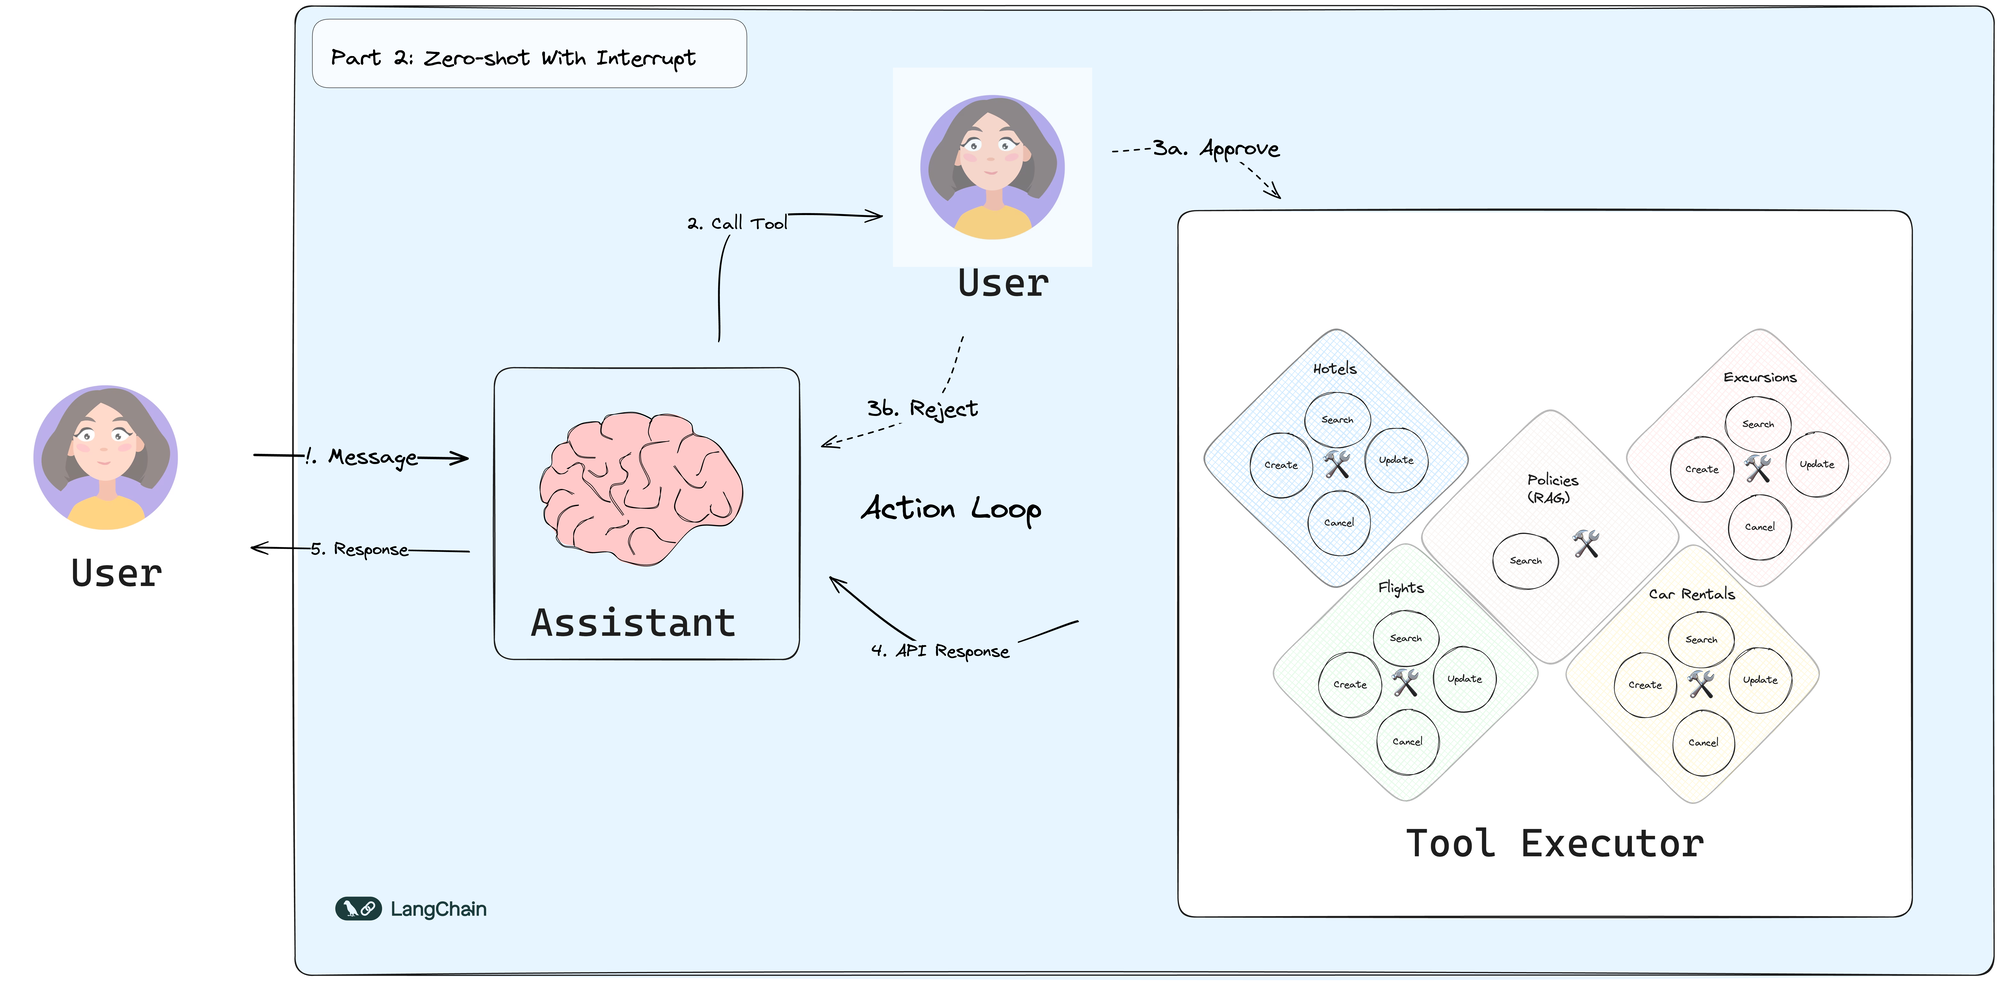

In [396]:
builder.add_node("fetch_user_info", user_info)
builder.add_edge(START, "fetch_user_info")
builder.add_node("assistant", Assistant(part_2_assistant_runnable))
builder.add_node("tools", create_tool_node_with_fallback(part_2_tools))
builder.add_edge("fetch_user_info", "assistant")
builder.add_conditional_edges(
    "assistant",
    tools_condition,
)
builder.add_edge("tools", "assistant")


memory = InMemorySaver()
part_2_graph = builder.compile(
    checkpointer=memory,
    # NEW: The graph will always halt before executing the "tools" node.
    # The user can approve or reject (or even alter the request) before
    # the assistant continues
    interrupt_before=["tools"],
)

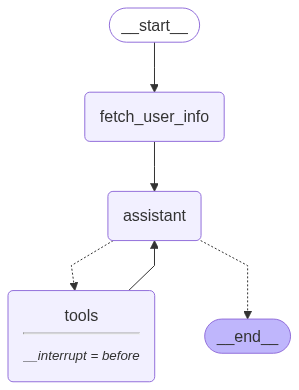

In [397]:
from IPython.display import Image, display

try:
    display(Image(part_2_graph.get_graph(xray=True).draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [398]:
import shutil
import uuid

# Update with the backup file so we can restart from the original place in each section
db = 'travel2.sqlite'
thread_id = str(uuid.uuid4())

config = {
    "configurable": {
        # The passenger_id is used in our flight tools to
        # fetch the user's flight information
        "passenger_id": "3442 587242",
        # Checkpoints are accessed by thread_id
        "thread_id": thread_id,
    }
}

In [399]:
_printed = set()
# We can reuse the tutorial questions from part 1 to see how it does.
for question in tutorial_questions:
    events = part_2_graph.stream(
        {"messages": ("user", question)}, config, stream_mode="values"
    )
    for event in events:
        _print_event(event, _printed)
    snapshot = part_2_graph.get_state(config)
    while snapshot.next:
        # We have an interrupt! The agent is trying to use a tool, and the user can approve or deny it
        # Note: This code is all outside of your graph. Typically, you would stream the output to a UI.
        # Then, you would have the frontend trigger a new run via an API call when the user has provided input.
        try:
            user_input = input(
                "Do you approve of the above actions? Type 'y' to continue;"
                " otherwise, explain your requested changed.\n\n"
            )
        except:
            user_input = "y"
        if user_input.strip() == "y":
            # Just continue
            result = part_2_graph.invoke(
                None,
                config,
            )
        else:
            # Satisfy the tool invocation by
            # providing instructions on the requested changes / change of mind
            result = part_2_graph.invoke(
                {
                    "messages": [
                        ToolMessage(
                            tool_call_id=event["messages"][-1].tool_calls[0]["id"],
                            content=f"API call denied by user. Reasoning: '{user_input}'. Continue assisting, accounting for the user's input.",
                        )
                    ]
                },
                config,
            )
        snapshot = part_2_graph.get_state(config)

================================ Human Message =================================

Hi there, what time is my flight?
[('7240005432906569', 'C46E9F', 19250, 'LX0112', 'CDG', 'BSL', '2025-08-05 12:21:40.019407-04:00', '2025-08-05 13:51:40.019407-04:00', '18E', 'Economy')]
['ticket_no', 'book_ref', 'flight_id', 'flight_no', 'departure_airport', 'arrival_airport', 'scheduled_departure', 'scheduled_arrival', 'seat_no', 'fare_conditions']
[{'ticket_no': '7240005432906569', 'book_ref': 'C46E9F', 'flight_id': 19250, 'flight_no': 'LX0112', 'departure_airport': 'CDG', 'arrival_airport': 'BSL', 'scheduled_departure': '2025-08-05 12:21:40.019407-04:00', 'scheduled_arrival': '2025-08-05 13:51:40.019407-04:00', 'seat_no': '18E', 'fare_conditions': 'Economy'}]
================================== Ai Message ==================================
Tool Calls:
  fetch_user_flight_information (ps6xgwgxk)
 Call ID: ps6xgwgxk
  Args:
    properties: {}
    type: object
[('7240005432906569', 'C46E9F', 19250, 'LX01

BadRequestError: Error code: 400 - {'error': {'message': 'Please reduce the length of the messages or completion.', 'type': 'invalid_request_error', 'param': 'messages', 'code': 'context_length_exceeded'}}